<a href="https://colab.research.google.com/github/neerajac19/Play-Store-App-Review-Analysis-EDA/blob/main/Play_Store_App_Review_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **Google Play Store apps and reviews**
Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.



Let's take a look at the data, which consists of two files:

apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path1='/content/drive/MyDrive/Colab Notebooks/Module1/Capstone project 2/Copy of Play Store Data.csv'

In [ ]:
df1=pd.read_csv(file_path1)

In [ ]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df1.shape

(10841, 13)

In [ ]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df1['App'].unique().shape

(9660,)

In [ ]:
file_path2='/content/drive/MyDrive/Colab Notebooks/Module1/Capstone project 2/Copy of User Reviews.csv'

In [ ]:
df2=pd.read_csv(file_path2)

In [ ]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df2.shape

(64295, 5)

In [ ]:
df2['App'].unique().shape

(1074,)

## **2. Data cleaning**
Data cleaning is one of the most essential subtask any data science project. Although it can be a very tedious process, it's worth should never be undermined.

By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like Installs and Price have a few special characters (+ , $) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].

Hence, we now proceed to clean our data. Specifically, the special characters , and + present in Installs column and $ present in Price column need to be removed.

It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the info() method to acheive this.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df1.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [ ]:
df1['Rating'].fillna(df1['Rating'].median(),inplace=True)

In [ ]:
df1[['Current Ver','Android Ver','Content Rating']]=df1[['Current Ver','Android Ver','Content Rating']].fillna('Not Available')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


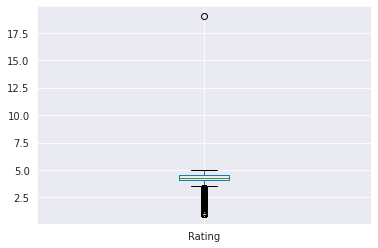

In [ ]:
df1.boxplot()

In [ ]:
df1[df1['Rating']>5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Not Available,"February 11, 2018",1.0.19,4.0 and up,Not Available


In [ ]:
df1=df1.drop(df1[df1['Rating']>5.0].index)

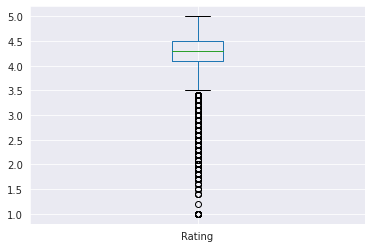

In [ ]:
df1.boxplot()

In [ ]:
df1.dropna(subset=['Type'],axis=0,inplace=True)

In [ ]:
df1=df1.drop_duplicates()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          10356 non-null  float64
 3   Reviews         10356 non-null  object 
 4   Size            10356 non-null  object 
 5   Installs        10356 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  object 
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
 10  Last Updated    10356 non-null  object 
 11  Current Ver     10356 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **3**. **Correcting data types** 
From the previous task we noticed that Installs and Price were categorized as object data type (and not int or float) as we would like. This is because these two columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read this.

The four features that we will be working with most frequently henceforth are Installs, Size, Rating and Price. While Size and Rating are both float (i.e. purely numerical data types), we still need to work on Installs and Price to make them numeric.

In [ ]:
#Removing '$' sign and converting datatype to float
price = []
for i in df1['Price']:
    if i[0]=='$':
        price.append(i[1:])
    else:
        price.append(i)

In [ ]:
df1['Price']=price
df1['Price']=df1['Price'].astype('float')

In [ ]:
df1['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df1.drop(labels=df1[df1['Price']=='Everyone'].index, inplace = True)
df1['Price']= price

In [ ]:
install = []
for j in df1['Installs']:
    install.append(j.replace(',','').replace('+','').strip())

df1['Installs']= install
df1['Installs']= df1['Installs'].astype('int')

In [ ]:
df1['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

## **4. Exploring app categories**
With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

Which category has the highest share of (active) apps in the market?
Is any specific category dominating the market?
Which categories have the fewest number of apps?
We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

Text(0.5, 0, 'App Category')

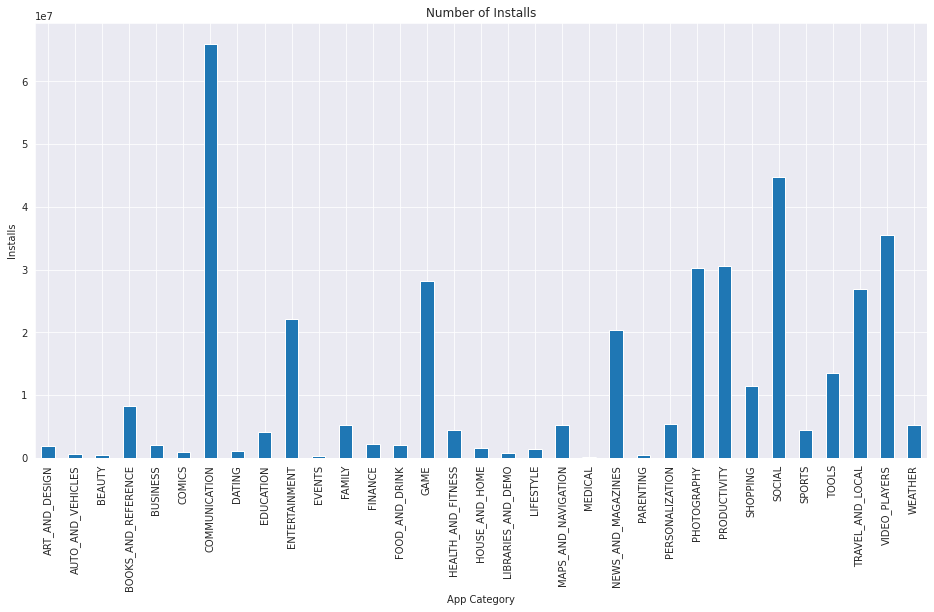

In [ ]:
fig = plt.figure(figsize=(16,8)) 
df1.groupby('Category')['Installs'].mean().plot(kind='bar',title='Number of Installs', fontsize=10)
plt.ylabel('Installs') 
plt.xlabel('App Category') 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

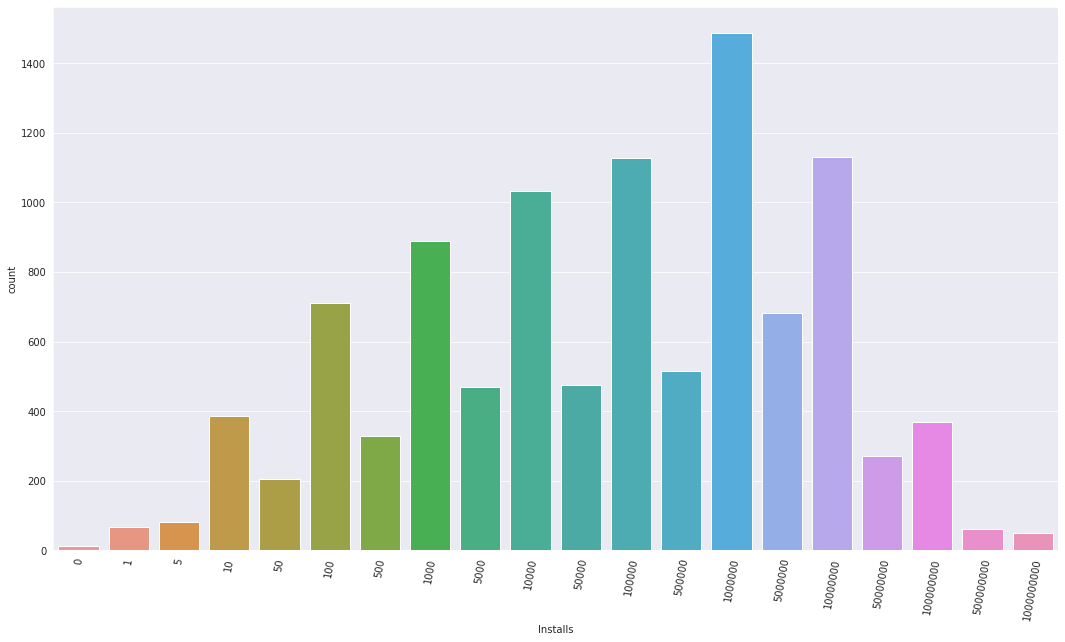

In [ ]:
sns.countplot(data=df1,x='Installs')
plt.xticks(rotation=80)

Number of categories =  33


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

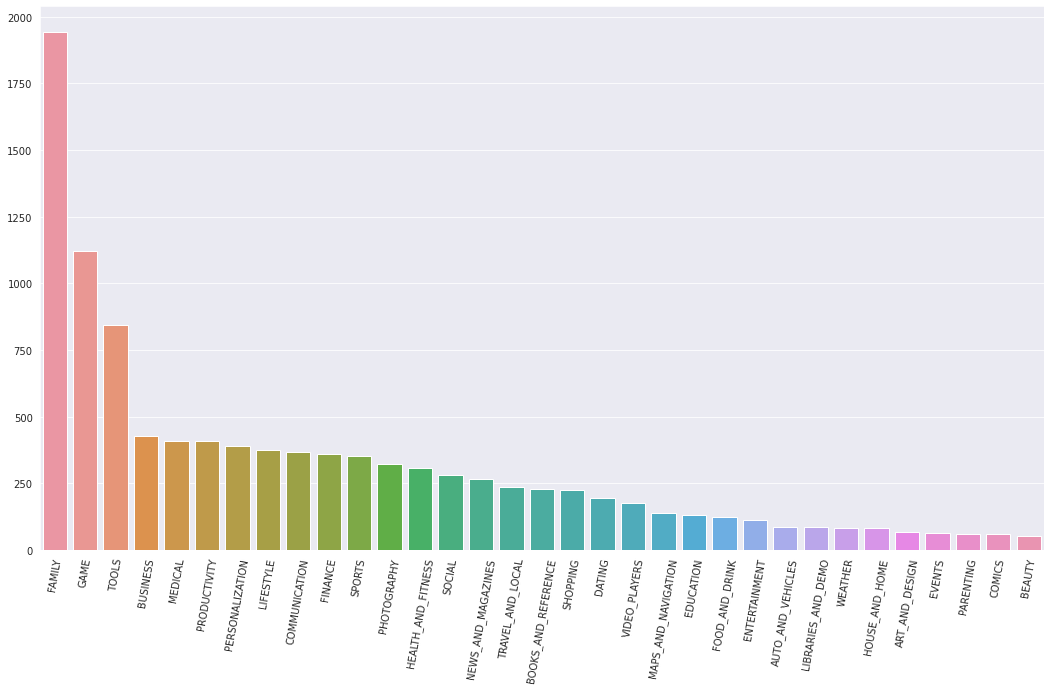

In [ ]:
# Print the total number of unique categories
num_categories = len(df1['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = df1['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)
plt.rcParams['figure.figsize'] = (18, 10)
sns.barplot(x = num_apps_in_category.index, # index = category name
y = num_apps_in_category.values )
plt.xticks(rotation=80)


## **5. Distribution of app ratings**
After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

Average app rating =  4.203727307840865


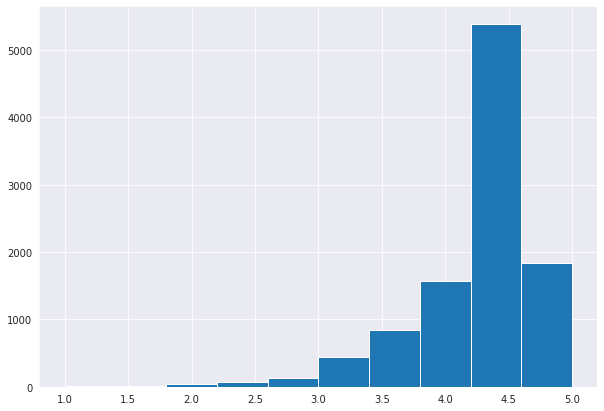

In [ ]:
# Average rating of apps
avg_app_rating = df1['Rating'].mean()
print('Average app rating = ', avg_app_rating)

a=np.array(df1['Rating'])
fig,ax=plt.subplots(figsize=(10,7))
ax.hist(a)
plt.show()

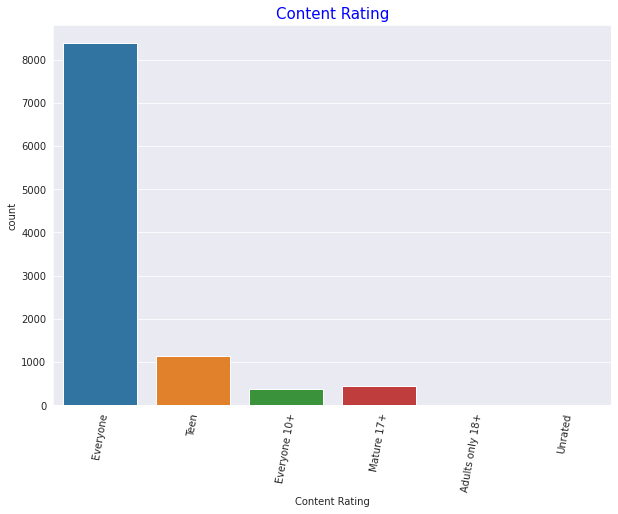

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=df1, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

## **6. Size and price of an app**
Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.

How can we effectively come up with strategies to size and price our app?

Does the size of an app affect its rating?
Do users really care about system-heavy apps or do they prefer light-weighted apps?
Does the price of an app affect its rating?
Do users always prefer free apps over paid apps?
We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under $10.

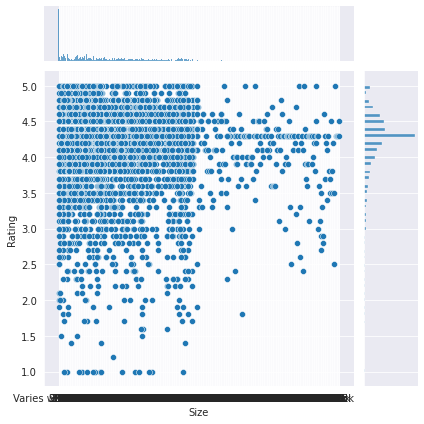

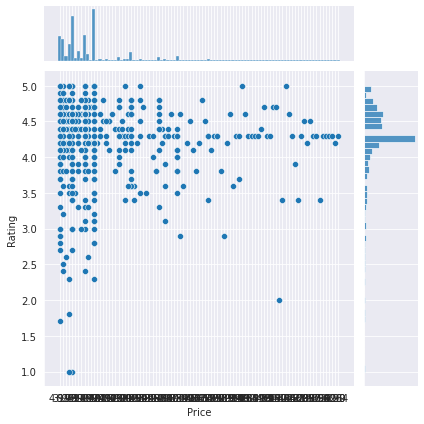

In [ ]:


# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = df1[(~df1['Rating'].isnull()) & (~df1['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']== 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## **7. Relation between app category and app price**
So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.

There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.

Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that Medical and Family apps are the most expensive. Some medical apps extend even up to $80! All game apps are reasonably priced below $20.

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


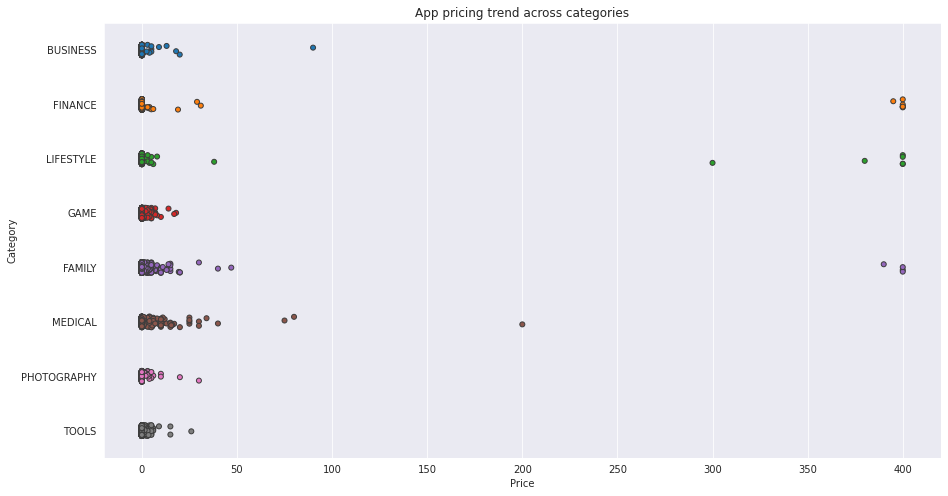

In [ ]:

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = df1[df1.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = df1[df1['Price']>200]
apps_above_200[['Category', 'App', 'Price']]

## **9. Popularity of paid apps vs free apps**
For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:

Free to download.
Main source of income often comes from advertisements.
Often created by companies that have other products and the app serves as an extension of those products.
Can serve as a tool for customer retention, communication, and customer service.
Some characteristics of paid apps are:

Users are asked to pay once for the app to download and use it.
The user can't really get a feel for the app before buying it.
Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!

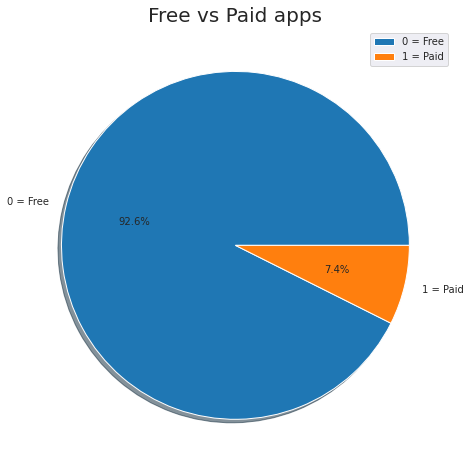

In [ ]:
#How many percent of applications are free and how many are paid?
#to check how many apps are free
fig = plt.figure(figsize=(16,8)) 
labels = ['0 = Free','1 = Paid']
sizes = df1['Type'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Free vs Paid apps',size = 20)
plt.legend()
plt.show()

Text(0.5, 0, 'Average price - USD')

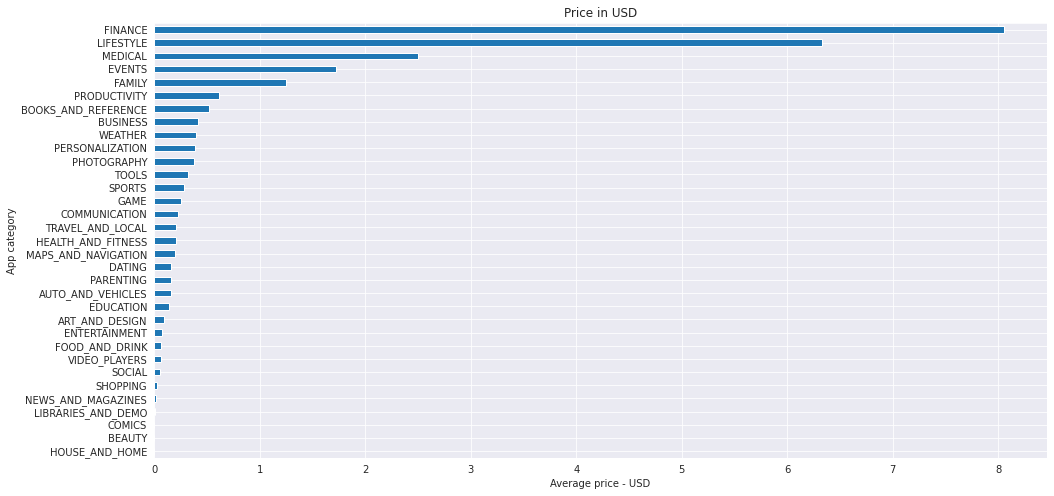

In [ ]:
#What is the average price of applications in each categories?
fig = plt.figure(figsize=(16,8)) 
df1.groupby('Category').mean().sort_values(by='Price',ascending='False')['Price'].plot(kind='barh',title='Price in USD', fontsize=10)
plt.ylabel('App category') 
plt.xlabel('Average price - USD') 

Observations
Finance apps are the costliest one
Games are the most installed category of the apps.
Average rating is irrelevant to the category
Around 19.7% of the apps are related to family
81.8% of the apps belong to everyone category